In [40]:
import os
import sys
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
from ResoFit._pulse_shape import NeutronPulse
from ResoFit._pulse_shape import ProtonPulse
from ResoFit.experiment import Experiment
import numpy as np
from ResoFit.simulation import Simulation
overwrite_csv = False
import scipy.signal as ss
import matplotlib.pyplot as plt
import plotly
plotly.offline.init_notebook_mode()
import plotly.graph_objs as go
%matplotlib notebook

In [2]:
# convolve_proton = True
# if convolve_proton:
#     title = 'Proton convolved'
# else:
#     title = 'No proton convolved'
source_to_detector_m = 16.45

simulation = Simulation(energy_min=7, energy_max=150, energy_step=0.1, database='ENDF_VII')
simulation.add_layer(layer='Gd', layer_thickness_mm=0.15)

In [ ]:
simulation._convolve_neutron_beam_shape(source_to_detector_m=source_to_detector_m)

folder = 'data/IPTS_19558/reso_data_19558'
data_file1 = 'Gd_thick.csv'
spectra_file = 'Image002_Spectra.txt'
experiment1 = Experiment(data_file=data_file1,
                         spectra_file=spectra_file,
                         folder=folder,
                         baseline=True)
# experiment1.slice(slice_start=300, reset_index=False)
# peak_df = experiment1.find_peak()

<IPython.core.display.Javascript object>


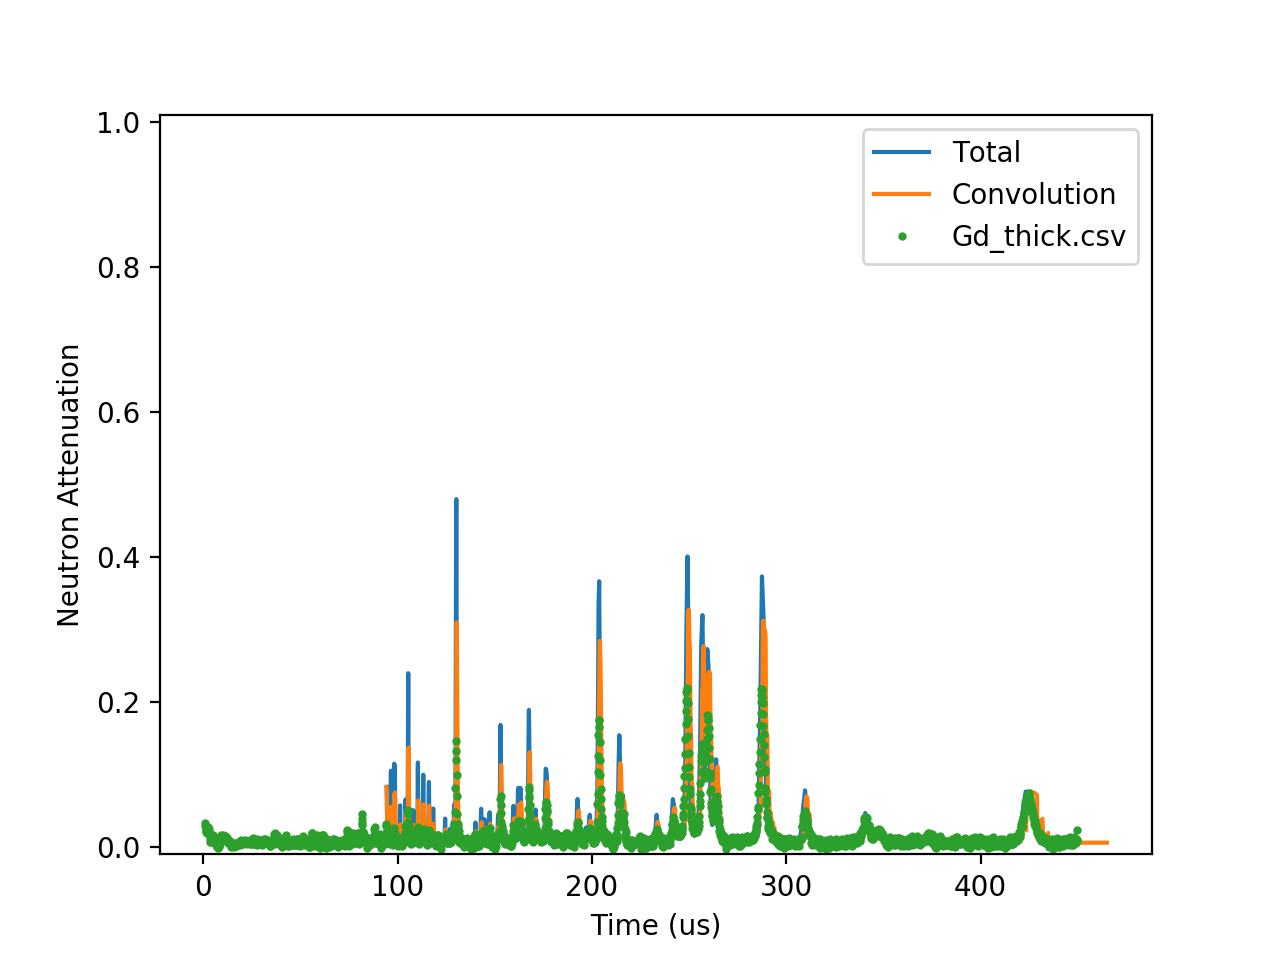

'Time (us)' was obtained with the following:
source_to_detector_m=16.45
offset_us=2.67


In [63]:
simulation.plot_simu(x_type='time', source_to_detector_m=source_to_detector_m, offset_us=2.67)
plt.plot(simulation.x_tof_us-2.9, simulation.y_att, label='Convolution')
experiment1.plot_raw(x_type='time', time_unit='us')

<IPython.core.display.Javascript object>


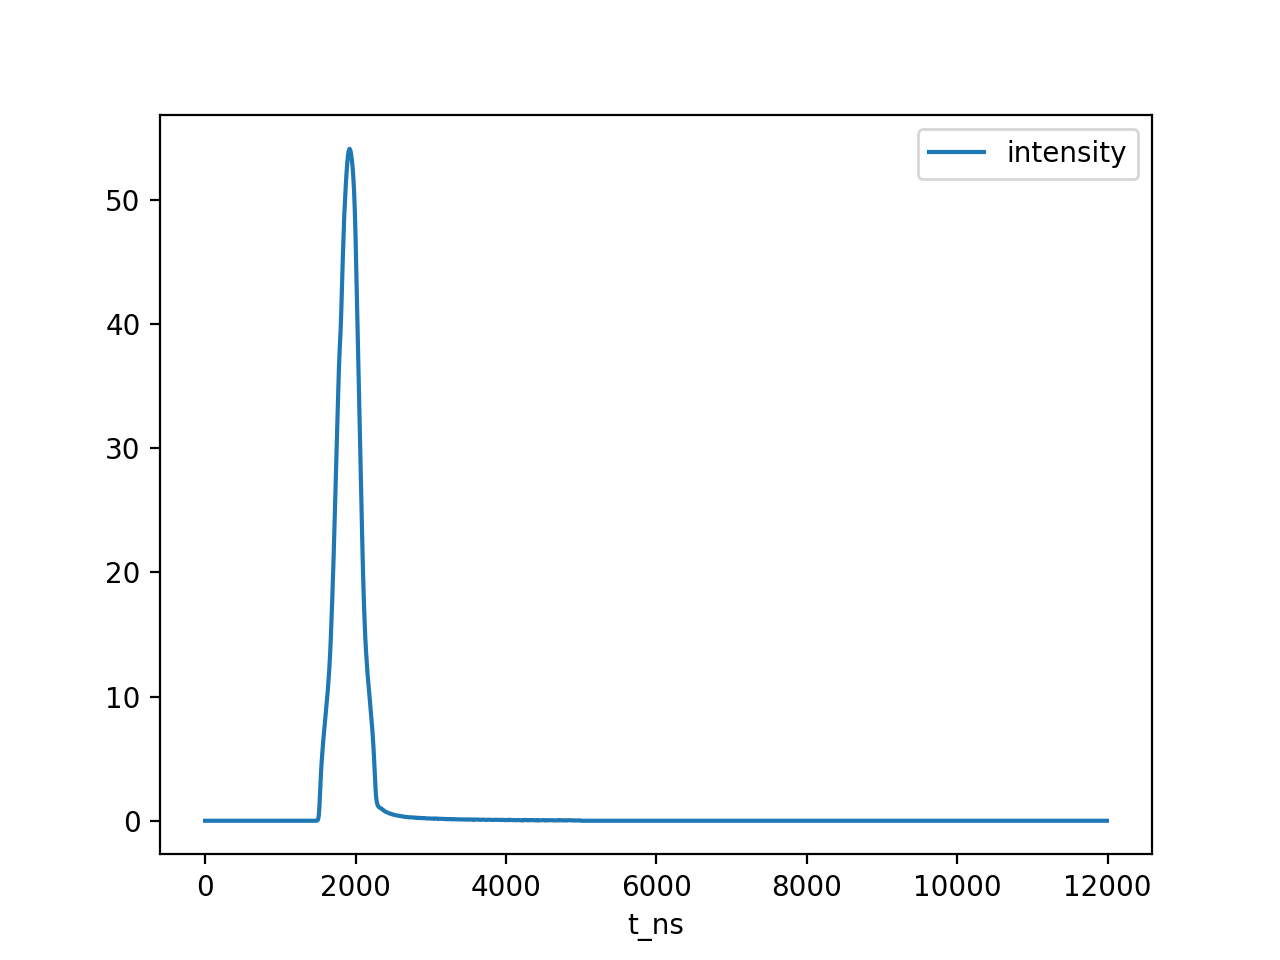

In [64]:
simulation.neutron_pulse.proton_pulse._shape_df.set_index('t_ns').plot()
plt.show()

In [39]:
simulation.neutron_pulse.proton_pulse.fit_shape()

Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
amplitude  1.984e+04     -inf      inf    36.58     True     None     None
center         1909     -inf      inf   0.3126     True     None     None
fwhm          345.7     -inf      inf   0.7362    False 2.3548200*sigma     None
height         53.9     -inf      inf  0.09941    False 0.3989423*amplitude/max(1.e-15, sigma)     None
sigma         146.8        0      inf   0.3126     True     None     None


/Users/y9z/anaconda3/envs/py36/lib/python3.6/site-packages/lmfit/models.py:30: FutureWarning:

'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.



In [6]:
simulation.neutron_pulse.proton_pulse.make_new_shape(sigma=146.8, amplitude=1)

In [9]:
trans = 1 - simulation.y_att

<IPython.core.display.Javascript object>


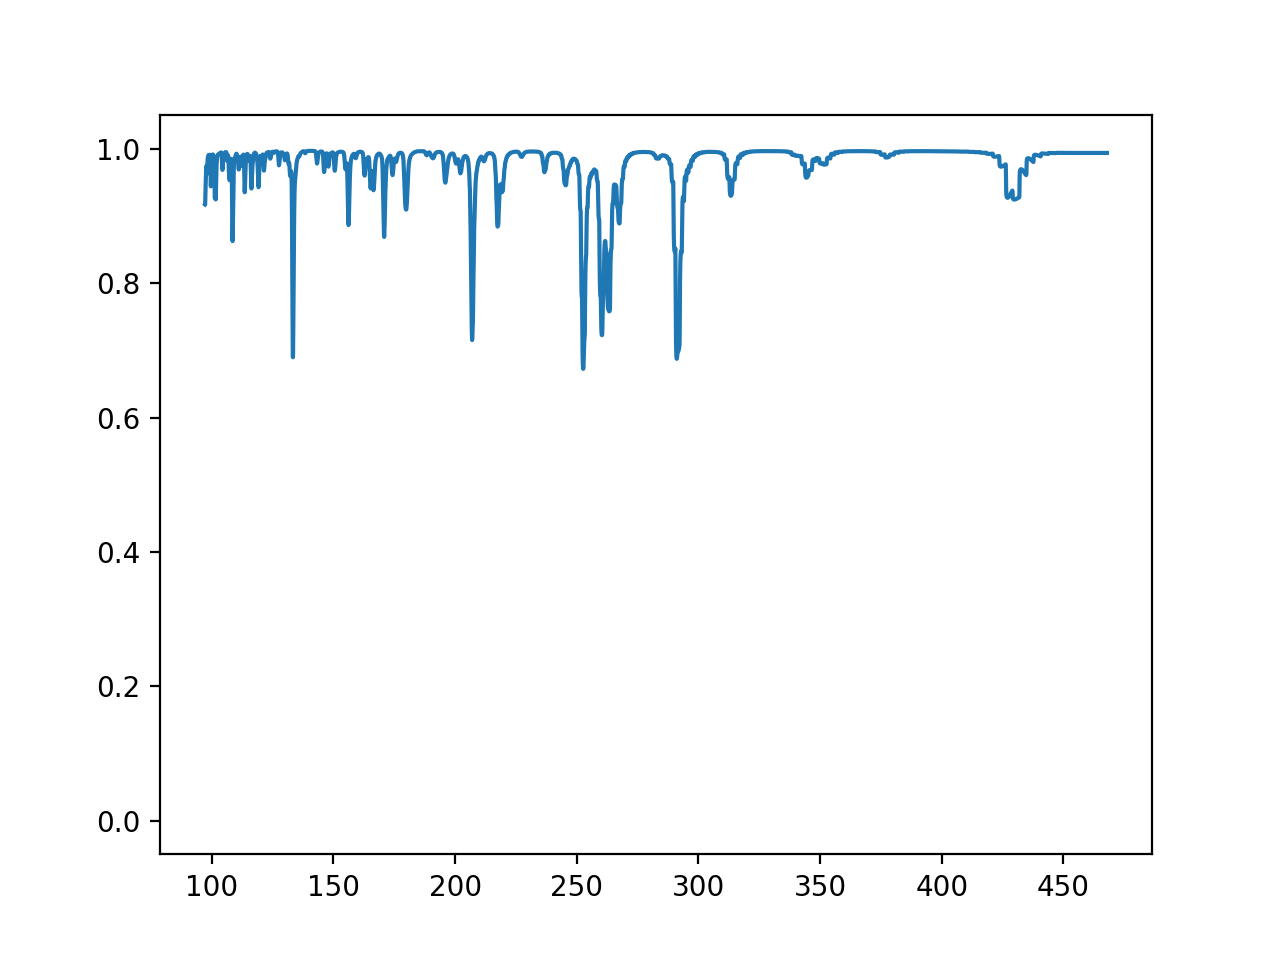

(-0.05, 1.05)

In [43]:
plt.plot(simulation.x_tof_us, trans)
plt.ylim(top=1.05, bottom=-0.05)

In [16]:
con = np.convolve(_shape_df['intensity']/1.984e+03,trans, mode='same')

In [57]:
plt.plot(simulation.x_tof_us, con)
plt.xlim(left=-20, right=470)

(-20, 470)

<IPython.core.display.Javascript object>


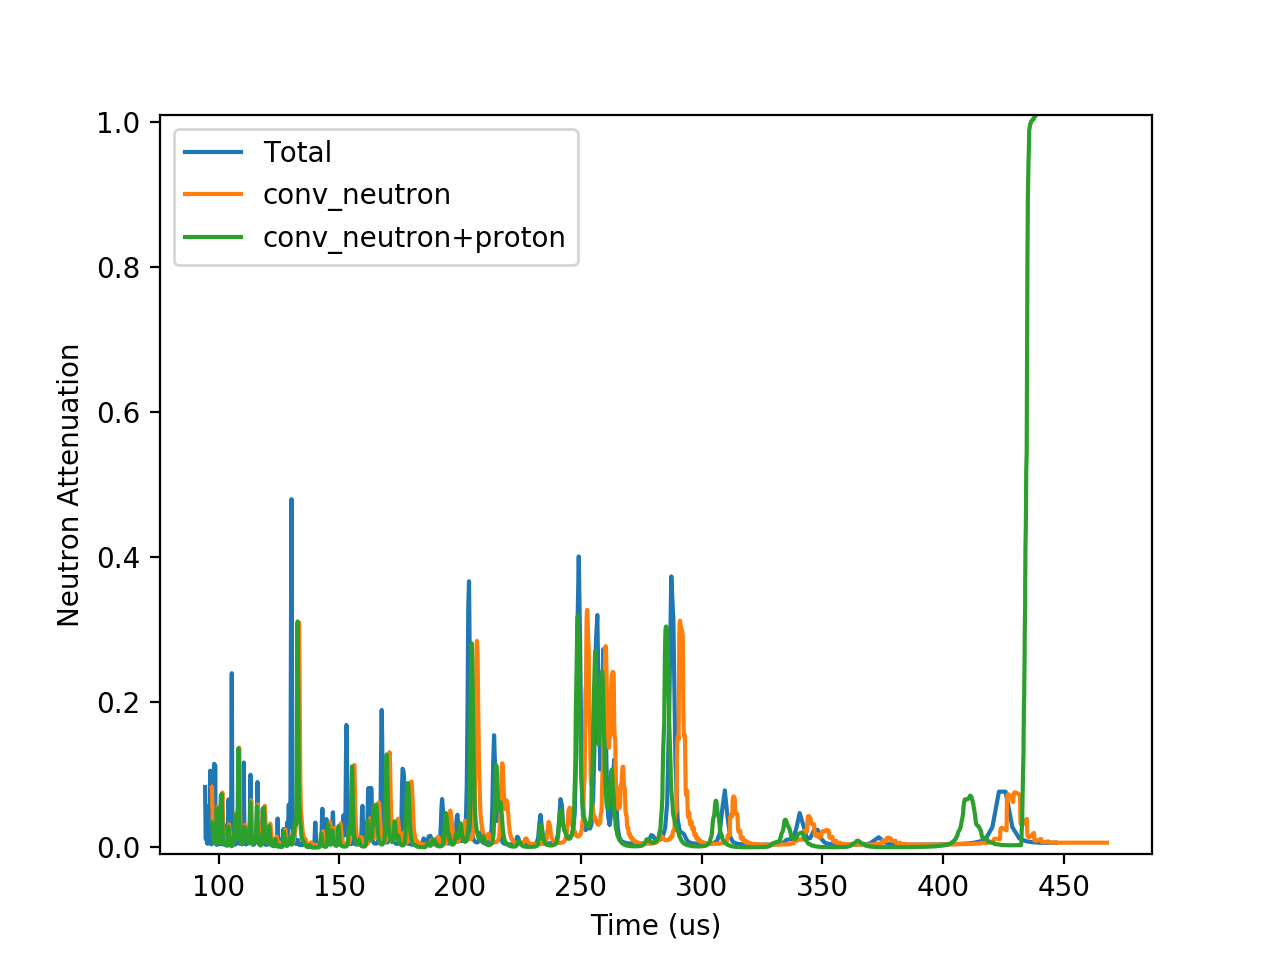

'Time (us)' was obtained with the following:
source_to_detector_m=16.45
offset_us=2.67


In [44]:
simulation.plot_simu(x_type='time', source_to_detector_m=source_to_detector_m, offset_us=2.67)
plt.plot(simulation.x_tof_us, 1-trans, label='conv_neutron')
plt.plot(simulation.x_tof_us, 1-con+0.02, label='conv_neutron+proton')
plt.legend()

In [59]:
# simulation.plot_simu(x_type='time', source_to_detector_m=source_to_detector_m, offset_us=2.67)
# plt.plot(simulation.x_tof_us, 1 - con, label='Convolution')
plt.plot(simulation.x_tof_us+ 0.5, 1- con, label='Convolution')
experiment1.plot_raw(x_type='time', time_unit='us')
plt.show()

<IPython.core.display.Javascript object>


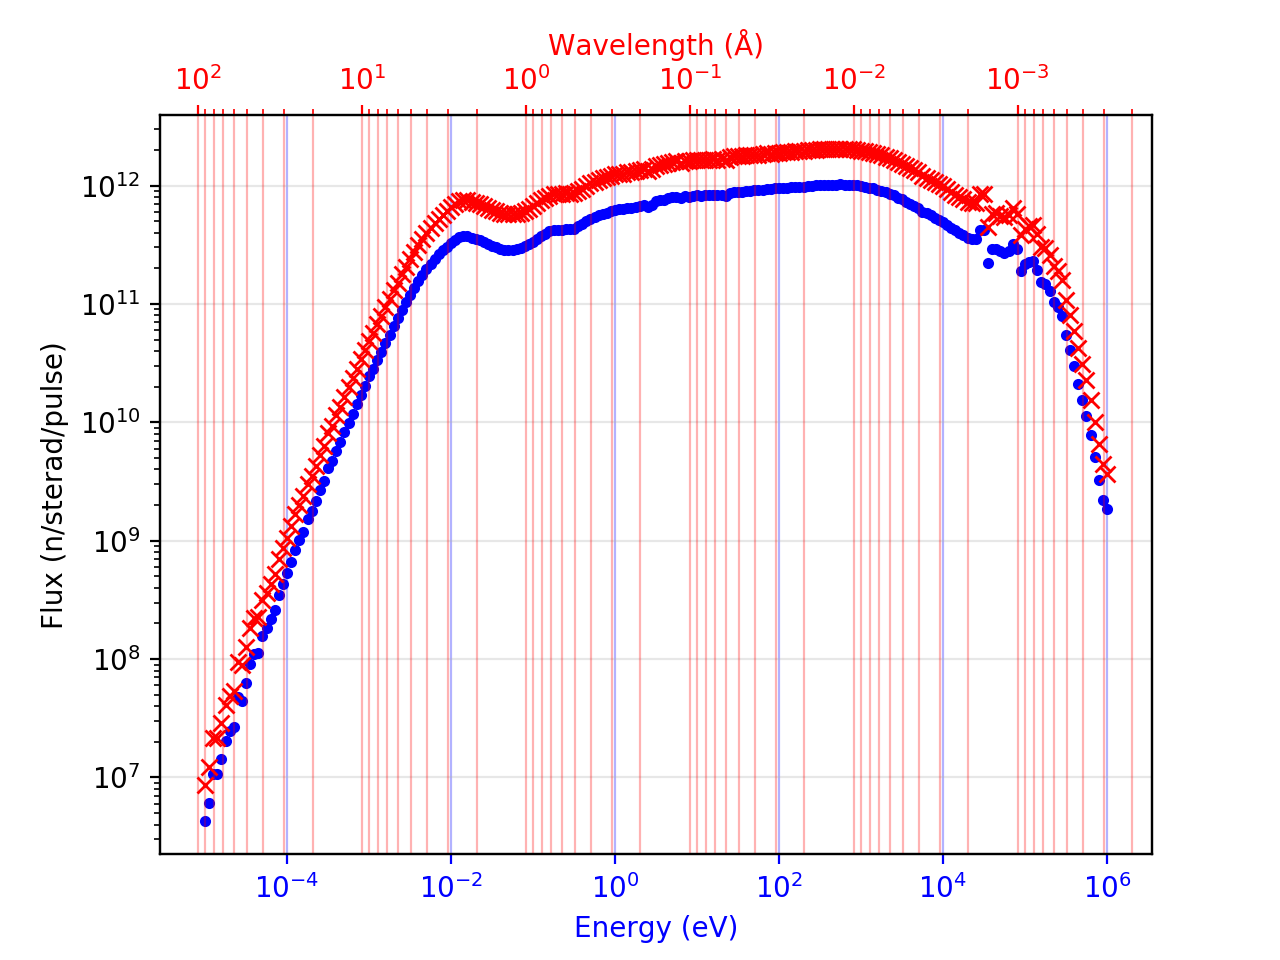

In [60]:
mpl_fig = simulation.neutron_pulse.plot_shape_total()

In [61]:
tof_us = simulation.neutron_pulse.shape_tof_df_interp['tof_us']